In [2]:
# Visualizations and data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
import re
import unicodedata
tokenizer = ToktokTokenizer()
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Other
import gzip 
from datetime import datetime

# Load the data

In [4]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [5]:
df_reviews = getDF('../Data/Raw Data/reviews_Electronics_5.json.gz')

In [7]:
df_reviews.shape

(1689188, 9)

In [8]:
df_reviews.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"


In [9]:
df_metadata = getDF('../Data/Raw Data/meta_Electronics.json.gz')

In [10]:
df_metadata.shape

(786445, 18)

In [11]:
df_metadata.head(3)

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details
0,"[Electronics, Camera &amp; Photo, Video Survei...",,[The following camera brands and models have b...,,Genuine Geovision 1 Channel 3rd Party NVR IP S...,[],[https://images-na.ssl-images-amazon.com/image...,,GeoVision,"[Genuine Geovision 1 Channel NVR IP Software, ...","[>#3,092 in Tools &amp; Home Improvement &gt; ...",[],Camera &amp; Photo,,"January 28, 2014",$65.00,0011300000,NaN
1,"[Electronics, Camera &amp; Photo]",,[This second edition of the Handbook of Astron...,,"Books ""Handbook of Astronomical Image Processi...",[0999470906],[https://images-na.ssl-images-amazon.com/image...,,33 Books Co.,[Detailed chapters cover these fundamental top...,"[>#55,933 in Camera &amp; Photo (See Top 100 i...","[0943396670, 1138055360, 0999470906]",Camera &amp; Photo,,"June 17, 2003",,0043396828,NaN
2,"[Electronics, eBook Readers &amp; Accessories,...",,[A zesty tale. (Publishers Weekly)<br /><br />...,,One Hot Summer,"[0425167798, 039914157X]",[],,Visit Amazon's Carolina Garcia Aguilera Page,[],"3,105,177 in Books (",[],Books,,,$11.49,0060009810,NaN


In [12]:
# Merge the 2 files to have all the info in one file 
df_metaReview = pd.merge(df_reviews, df_metadata, how='left' , on='asin' )

In [13]:
df_metaReview.shape

(1785863, 26)

In [14]:
# Remove the unnecessary fields 
df_metaReview.drop(['reviewerName', 'unixReviewTime','fit','also_buy', 'image', 
                 'tech1', 'tech2', 'also_view', 'similar_item', 'details', 'date'], axis=1, inplace= True)

In [15]:
# Check to see the Null values 
df_metaReview = df_metaReview.replace('', np.nan)

In [16]:
df_metaReview.isna().sum()

reviewerID           0
asin                 0
helpful              0
reviewText        1116
overall              0
summary              0
reviewTime           0
category        657307
description     657307
title           657307
brand           658403
feature         657307
rank            657307
main_cat        657726
price          1170381
dtype: int64

In [17]:
# Remove the Null values
df_metaReview.dropna(subset=['category'], inplace= True)

In [18]:
df_metaReview.isna().sum()

reviewerID          0
asin                0
helpful             0
reviewText        685
overall             0
summary             0
reviewTime          0
category            0
description         0
title               0
brand            1096
feature             0
rank                0
main_cat          419
price          513074
dtype: int64

In [21]:
df_metaReview.shape

(1128556, 15)

In [23]:
# Inspect the data
df_metaReview['main_cat'].value_counts().head(10)

All Electronics              327689
Computers                    245776
Home Audio & Theater         199195
Camera & Photo               177653
Cell Phones & Accessories     49215
Home Audio &amp; Theater      31767
Camera &amp; Photo            25133
Amazon Devices                18365
Car Electronics               17553
Musical Instruments            6424
Name: main_cat, dtype: int64

In [25]:
df_metaReview['category'].value_counts().head(10)

[Electronics, Computers & Accessories, Tablet Accessories, Bags, Cases & Sleeves, Cases]                                27629
[Electronics, Headphones, Earbud Headphones]                                                                            26310
[Electronics, Camera & Photo, Digital Cameras, Point & Shoot Digital Cameras]                                           19019
[Electronics, Computers & Accessories, Networking Products, Routers]                                                    17628
[Electronics, Computers & Accessories, Computer Accessories & Peripherals, Keyboards, Mice & Accessories, Mice]         17419
[Electronics, Headphones, Over-Ear Headphones]                                                                          17259
[Electronics, Accessories & Supplies, Audio & Video Accessories, Cables & Interconnects, Video Cables, HDMI Cables]     17225
[Electronics, Camera & Photo, Lenses, Camera Lenses, SLR Camera Lenses]                                               

In [55]:
# Extract the headphone products only
df = df_metaReview[df_metaReview["title"].str.contains("headphones|headphone|Headphones|Headphone")]

df = df[~df['review_summary'].isna()]
df.head()

,reviewerID,asin,helpful,reviewText,overall,summary,reviewTime,category,description,title,brand,feature,rank,main_cat,price
1140,A22KW5YWAI5YDO,B000001OMI,"[0, 0]",Good headphones. I like (very much) that the...,4.0,"Light, one wire, headphones...","11 24, 2013","[Electronics, Headphones, On-Ear Headphones]",[The stylish HP200S Stereo Line silver headpho...,Maxell 190318 Lightweight Adjustable Open Air ...,Maxell,"[Lightweight, Open-air Headphones, Ideal For A...","[>#53,588 in Cell Phones & Accessories (See To...",Home Audio & Theater,$6.55
1141,A2FUMBORC5EMXG,B000001OMI,"[0, 0]",My job involves wearing earphones ALL THE TIME...,5.0,Love earphones that aren't too tight,"03 10, 2014","[Electronics, Headphones, On-Ear Headphones]",[The stylish HP200S Stereo Line silver headpho...,Maxell 190318 Lightweight Adjustable Open Air ...,Maxell,"[Lightweight, Open-air Headphones, Ideal For A...","[>#53,588 in Cell Phones & Accessories (See To...",Home Audio & Theater,$6.55
1142,A680RUE1FDO8B,B000001OMI,"[4, 5]",Obviously these headphones are not for the aud...,5.0,Excellent day-to-day headphones,"11 27, 2008","[Electronics, Headphones, On-Ear Headphones]",[The stylish HP200S Stereo Line silver headpho...,Maxell 190318 Lightweight Adjustable Open Air ...,Maxell,"[Lightweight, Open-air Headphones, Ideal For A...","[>#53,588 in Cell Phones & Accessories (See To...",Home Audio & Theater,$6.55
1143,A37NP1T8KCEMOW,B000001OMI,"[0, 0]",These headphones are perfect for the walking i...,4.0,Simple.,"12 15, 2013","[Electronics, Headphones, On-Ear Headphones]",[The stylish HP200S Stereo Line silver headpho...,Maxell 190318 Lightweight Adjustable Open Air ...,Maxell,"[Lightweight, Open-air Headphones, Ideal For A...","[>#53,588 in Cell Phones & Accessories (See To...",Home Audio & Theater,$6.55
1144,A28OZBLQKKYGOR,B000001OMI,"[0, 0]","Another good buy. Again, very affordable, and...",4.0,Worth the inexpensive price.,"03 27, 2014","[Electronics, Headphones, On-Ear Headphones]",[The stylish HP200S Stereo Line silver headpho...,Maxell 190318 Lightweight Adjustable Open Air ...,Maxell,"[Lightweight, Open-air Headphones, Ideal For A...","[>#53,588 in Cell Phones & Accessories (See To...",Home Audio & Theater,$6.55


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58295 entries, 1140 to 1785367
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   reviewerID   58295 non-null  object 
 1   asin         58295 non-null  object 
 2   helpful      58295 non-null  object 
 3   reviewText   58277 non-null  object 
 4   overall      58295 non-null  float64
 5   summary      58295 non-null  object 
 6   reviewTime   58295 non-null  object 
 7   category     58295 non-null  object 
 8   description  58295 non-null  object 
 9   title        58295 non-null  object 
 10  brand        58267 non-null  object 
 11  feature      58295 non-null  object 
 12  rank         58295 non-null  object 
 13  main_cat     58295 non-null  object 
 14  price        32411 non-null  object 
dtypes: float64(1), object(14)
memory usage: 7.1+ MB


In [57]:
# Create a new column with combining 'reviewText' and 'summary'
df['review_summary'] = df['reviewText'] + df['summary']
df.drop([ 'reviewText', 'summary'], axis=1, inplace= True)

In [46]:
df.tail(3)

,reviewerID,asin,helpful,overall,reviewTime,category,description,title,brand,feature,rank,main_cat,price,review_summary
1785365,A1ZEUQ2D21GAQD,B00KD0LVXM,"[0, 0]",4.0,"06 28, 2014","[Electronics, Portable Audio & Video, MP3 & MP...",[Alpatronix AX310 Ultra Portable Mini Wireless...,"Samnyte Bluetooth Headset, V4.1 Hands Free Car...",Alpatronix,[Latest Bluetooth 4.0 technology for quality w...,"[>#58,209 in Electronics > Portable Audio & Vi...",Home Audio & Theater,NaN,"Connection wise, I've had no issues connecting..."
1785366,A31FL6ULIB78MI,B00KD0LVXM,"[2, 2]",5.0,"06 14, 2014","[Electronics, Portable Audio & Video, MP3 & MP...",[Alpatronix AX310 Ultra Portable Mini Wireless...,"Samnyte Bluetooth Headset, V4.1 Hands Free Car...",Alpatronix,[Latest Bluetooth 4.0 technology for quality w...,"[>#58,209 in Electronics > Portable Audio & Vi...",Home Audio & Theater,NaN,I wasn't expecting too much from such a small ...
1785367,A3EKGN43O8XDWV,B00KD0LVXM,"[0, 0]",4.0,"06 20, 2014","[Electronics, Portable Audio & Video, MP3 & MP...",[Alpatronix AX310 Ultra Portable Mini Wireless...,"Samnyte Bluetooth Headset, V4.1 Hands Free Car...",Alpatronix,[Latest Bluetooth 4.0 technology for quality w...,"[>#58,209 in Electronics > Portable Audio & Vi...",Home Audio & Theater,NaN,Good quality for the price. We were surprised...


In [48]:
# Look at a sample review 
df['review_summary'][1785367]

"Good quality for the price.  We were surprised by the sound coming out of such a small speaker.  It obviously doesn't have as rich a sound as a larger, more expensive bluetooth speaker, but has decent quality and volume for it's size.  The bluetooth pairing works well and we haven't had any problems with static or break-ups in the bluetooth signal.  We took the speaker to the beach and kept our iPod in the backpack where it could stay safe and clean, and placed the speaker on our cooler.  It provided plenty of volume and it was nice that we could move the speaker around as needed, without interrupting the music.The speaker comes with a rechargeable battery and a USB cable, and my only complaint about the speaker is that there is no charge indicator light - nothing lights ups when it is plugged in, so you know it is charging.  Nor is there anything to indicate that the speaker is done charging.  If they could fix that one thing, this would be a perfect little bluetooth speaker.  Even w

In [58]:
# Create a new column for rating class based on ratings 
df['rating_class'] = df['overall'].apply(lambda x: 'bad' if x < 3 else'good')

# Add year of review 
df['reviewTime'] = pd.to_datetime(df['reviewTime'])
df['year'] = df['reviewTime'].dt.year

df.head()

,reviewerID,asin,helpful,overall,reviewTime,category,description,title,brand,feature,rank,main_cat,price,review_summary,rating_class,year
1140,A22KW5YWAI5YDO,B000001OMI,"[0, 0]",4.0,2013-11-24,"[Electronics, Headphones, On-Ear Headphones]",[The stylish HP200S Stereo Line silver headpho...,Maxell 190318 Lightweight Adjustable Open Air ...,Maxell,"[Lightweight, Open-air Headphones, Ideal For A...","[>#53,588 in Cell Phones & Accessories (See To...",Home Audio & Theater,$6.55,Good headphones. I like (very much) that the...,good,2013
1141,A2FUMBORC5EMXG,B000001OMI,"[0, 0]",5.0,2014-03-10,"[Electronics, Headphones, On-Ear Headphones]",[The stylish HP200S Stereo Line silver headpho...,Maxell 190318 Lightweight Adjustable Open Air ...,Maxell,"[Lightweight, Open-air Headphones, Ideal For A...","[>#53,588 in Cell Phones & Accessories (See To...",Home Audio & Theater,$6.55,My job involves wearing earphones ALL THE TIME...,good,2014
1142,A680RUE1FDO8B,B000001OMI,"[4, 5]",5.0,2008-11-27,"[Electronics, Headphones, On-Ear Headphones]",[The stylish HP200S Stereo Line silver headpho...,Maxell 190318 Lightweight Adjustable Open Air ...,Maxell,"[Lightweight, Open-air Headphones, Ideal For A...","[>#53,588 in Cell Phones & Accessories (See To...",Home Audio & Theater,$6.55,Obviously these headphones are not for the aud...,good,2008
1143,A37NP1T8KCEMOW,B000001OMI,"[0, 0]",4.0,2013-12-15,"[Electronics, Headphones, On-Ear Headphones]",[The stylish HP200S Stereo Line silver headpho...,Maxell 190318 Lightweight Adjustable Open Air ...,Maxell,"[Lightweight, Open-air Headphones, Ideal For A...","[>#53,588 in Cell Phones & Accessories (See To...",Home Audio & Theater,$6.55,These headphones are perfect for the walking i...,good,2013
1144,A28OZBLQKKYGOR,B000001OMI,"[0, 0]",4.0,2014-03-27,"[Electronics, Headphones, On-Ear Headphones]",[The stylish HP200S Stereo Line silver headpho...,Maxell 190318 Lightweight Adjustable Open Air ...,Maxell,"[Lightweight, Open-air Headphones, Ideal For A...","[>#53,588 in Cell Phones & Accessories (See To...",Home Audio & Theater,$6.55,"Another good buy. Again, very affordable, and...",good,2014


In [50]:
df['rating_class'].value_counts()

good    50761
bad      7534
Name: rating_class, dtype: int64

In [33]:
7534/50761

0.14842103189456474

# Text Preprocessing

In [64]:
# calculate raw tokens in order to measure of cleaned tokens
raw_tokens=len([w for t in (df_coffee["review_summary"].apply(word_tokenize)) for w in t])
print('Number of raw tokens: {}'.format(raw_tokens))

Number of raw tokens: 8936068


In [65]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

In [66]:
def normalize_and_lemmaize(input):
    sample = denoise_text(input)
    #sample = expand_contractions(sample)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58277 entries, 1140 to 1785367
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      58277 non-null  object        
 1   asin            58277 non-null  object        
 2   helpful         58277 non-null  object        
 3   overall         58277 non-null  float64       
 4   reviewTime      58277 non-null  datetime64[ns]
 5   category        58277 non-null  object        
 6   description     58277 non-null  object        
 7   title           58277 non-null  object        
 8   brand           58249 non-null  object        
 9   feature         58277 non-null  object        
 10  rank            58277 non-null  object        
 11  main_cat        58277 non-null  object        
 12  price           32405 non-null  object        
 13  review_summary  58277 non-null  object        
 14  rating_class    58277 non-null  object        
 1

In [68]:
df['clean_text'] = df['review_summary'].apply(lambda text: normalize_and_lemmaize(text))

In [69]:
df.sample(5)

,reviewerID,asin,helpful,overall,reviewTime,category,description,title,brand,feature,rank,main_cat,price,review_summary,rating_class,year,clean_text
499835,A3RUEBT3B6482W,B00172M8HS,"[0, 0]",5.0,2013-01-03,"[Electronics, Headphones, On-Ear Headphones]","[Features:\n\n * Safe, no-painted finish\n * H...",Sony Mdr-222Kd/Pin Childrens Headphones (Pink),Sony,[Designed For Children.Connectivity Technology...,"[>#111,419 in Cell Phones & Accessories (See T...",Home Audio & Theater,$2.00,This pair of headphones is ideal for girls age...,good,2013,pair headphones ideal girls age smaller regula...
76454,A1M4Q59TC9CI6R,B00006J07O,"[0, 0]",2.0,2012-01-21,"[Electronics, Headphones, Earbud Headphones]",[Panasonic RP-HV152 Portable Earbud Headphones...,Panasonic RP-HV152 Portable Earbud Headphones ...,Panasonic,"[XBS port increases bass response, Neodymium r...","[>#577,286 in Cell Phones &amp; Accessories (S...",Home Audio &amp; Theater,NaN,These headphones have poor sound quality. Alth...,bad,2012,headphones poor sound quality although price c...
1745860,A7KVMEIDJP0JK,B00EWJHRMY,"[0, 0]",5.0,2014-01-11,"[Electronics, Headphones, Over-Ear Headphones]",[Same lifelike sound-now available in limited-...,Bose QuietComfort 15 Acoustic Noise Cancelling...,Bose,[The best around-ear headphones from Bose redu...,"[>#106,676 in Cell Phones & Accessories (See T...",Home Audio & Theater,NaN,"I've owned BOSE, SONY, and PHILLIPS noise canc...",good,2014,ive own bose sony phillips noise cancel headse...
894835,AJM8T3W3A0BLY,B003MB0WMA,"[1, 1]",5.0,2012-05-01,"[Electronics, Headphones, Earbud Headphones]","[Built to fuel your music, these cush Marqii h...",Sony MDRPQ4/PNK PIIQ Headphones,Sony,"[Ear Cups : Closed, Dynamic (supra-aural), Des...","[>#446,465 in Cell Phones & Accessories (See T...",Home Audio & Theater,NaN,I love these buds for my exercise at the gym. ...,good,2012,love bud exercise gym yoga upside place workou...
614824,A2H19YOC0VBAA4,B001RB24NM,"[1, 1]",2.0,2011-03-31,"[Electronics, Headphones, Earbud Headphones]",[Successor model for MDR-EX55 change to new h...,Sony MDR-EX56LP/BLK EX Style Headphones - Hybr...,Sony,[9mm EX provides comfort fit and deep bass sou...,"[>#749,083 in Cell Phones & Accessories (See T...",Home Audio & Theater,NaN,The right ear in mine went out and just stoppe...,bad,2011,right ear mine go stop play without cord damag...


In [72]:
# Look at a sample review, before and after preprocessing
df['review_summary'][1785367]

"Good quality for the price.  We were surprised by the sound coming out of such a small speaker.  It obviously doesn't have as rich a sound as a larger, more expensive bluetooth speaker, but has decent quality and volume for it's size.  The bluetooth pairing works well and we haven't had any problems with static or break-ups in the bluetooth signal.  We took the speaker to the beach and kept our iPod in the backpack where it could stay safe and clean, and placed the speaker on our cooler.  It provided plenty of volume and it was nice that we could move the speaker around as needed, without interrupting the music.The speaker comes with a rechargeable battery and a USB cable, and my only complaint about the speaker is that there is no charge indicator light - nothing lights ups when it is plugged in, so you know it is charging.  Nor is there anything to indicate that the speaker is done charging.  If they could fix that one thing, this would be a perfect little bluetooth speaker.  Even w

In [73]:
df['clean_text'][1785367]

'good quality price surprise sound come small speaker obviously doesnt rich sound larger expensive bluetooth speaker decent quality volume size bluetooth pair work well havent problems static breakups bluetooth signal take speaker beach keep ipod backpack could stay safe clean place speaker cooler provide plenty volume nice could move speaker around need without interrupt musicthe speaker come rechargeable battery usb cable complaint speaker no charge indicator light nothing light up plug know charge anything indicate speaker do charge could fix one thing would perfect little bluetooth speaker even without price cant complain muchi havent use builtin microphone yet phonecalls update ive use feature next weekend im travel rental car hope use speakerphone cargood small bluetooth speaker'

In [74]:
# Let's put aside number of raw tokens in order to measure of cleaned tokens
clean_tokens=len([w for t in (df["clean_text"].apply(word_tokenize)) for w in t])

print('Number of clean tokens: {}\n'.format(clean_tokens))
print('Percentage of removed tokens: {0:.2f}'.format(1-(clean_tokens/raw_tokens)))

Number of clean tokens: 4041974

Percentage of removed tokens: 0.55


In [6]:
# Pickle headphone data
df.to_pickle('../Data/Processed Data/Headphone_CleanText.pkl')

# EDA

In [4]:
df = pd.read_pickle('../Data/Processed Data/Headphone_CleanText.pkl')

**1.** Number of reviews per rating:

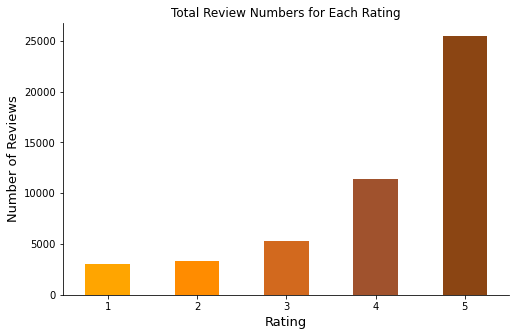

In [8]:
ratings_counts = df.groupby('overall', as_index= False)['asin'].count().sort_values('asin', ascending=True)
ratings_counts.index=[1,2,3,4,5]

plt.figure(figsize = (8,5))
mycolors =['orange', 'darkorange','chocolate', 'sienna', 'saddlebrown']       
ratings_counts['asin'].plot(kind="bar", color = mycolors)

sns.despine()
plt.xticks(rotation=0)
plt.title('Total Review Numbers for Each Rating')
plt.xlabel('Rating', fontsize = 13)
plt.ylabel('Number of Reviews', fontsize = 13)

plt.savefig('../Images/Reviews_per_rating.jpg');

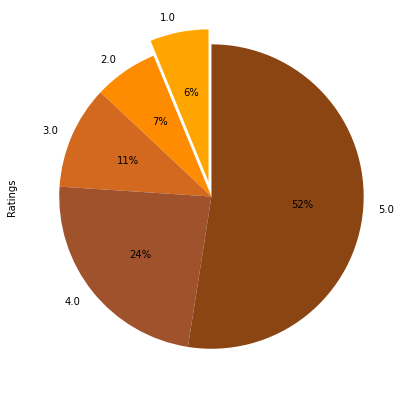

In [10]:
plt.figure(figsize = (7,7))
mycolors =['lavenderblush', 'pink', 'lightcoral', 'indianred', 'darkred'] 

df2 = df.rename({'overall': 'Ratings'},axis=1)
df2.groupby('Ratings')['Ratings'].count().plot(kind='pie',autopct='%1.0f%%',
                                                     startangle=90,explode=(.1,0,0,0,0), 
                                                     colors = mycolors)

plt.savefig('../Images/Reviews_pie_chart.jpg');

---
**2.** Review length per rating:

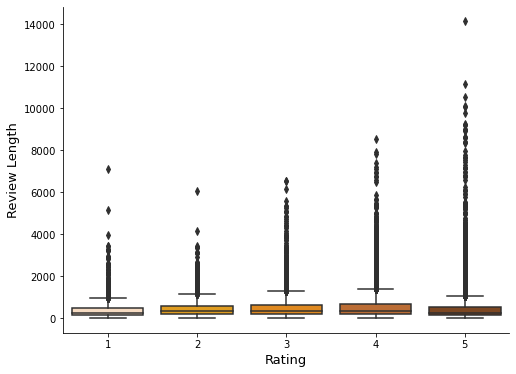

In [6]:
plt.figure(figsize = (8,6))
mycolors = ['peachpuff', 'orange', 'darkorange', 'chocolate', 'saddlebrown']

sns.boxplot(x="overall",y='review_length',data=df,
            order = [1,2,3,4,5],
            palette= mycolors)
sns.despine()

plt.xlabel('Rating', fontsize = 13) 
plt.ylabel('Review Length', fontsize = 13);

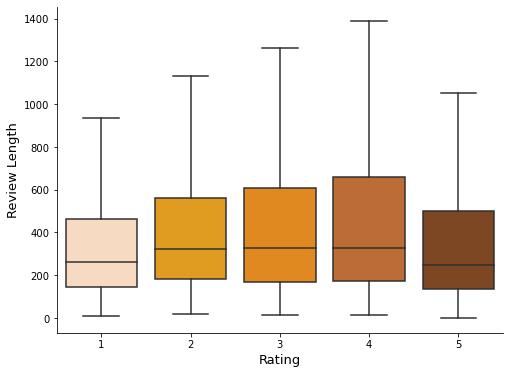

In [7]:
plt.figure(figsize = (8,6))
mycolors =['peachpuff', 'orange', 'darkorange', 'chocolate', 'saddlebrown']

sns.boxplot(x="overall",y='review_length',data=df,
            showfliers=False,
            order = [1,2,3,4,5],
            palette= mycolors)

sns.despine()
plt.xlabel('Rating', fontsize = 13) 
plt.ylabel('Review Length', fontsize = 13)

plt.savefig('../Images/Box_plot_reviews_length.jpg');

---
**3.** Number of reviews and products per year 

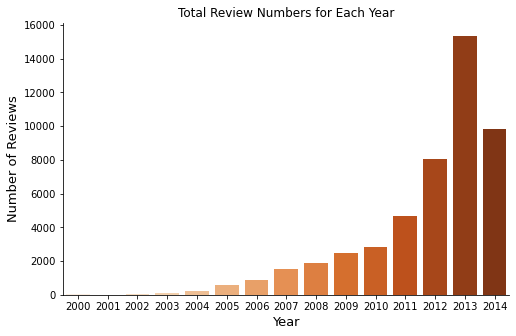

In [13]:
review_per_year = df.groupby('year', as_index= False)['asin'].count().sort_values('year')
review_per_year = review_per_year.rename({'asin':'Number of Reviews'}, axis=1)

plt.figure(figsize = (8,5))
#mycolors =['crimson', 'crimson', 'lightcoral', 'pink', 'pink'] 
sns.barplot(x='year',y='Number of Reviews', data = review_per_year, palette ='Oranges')
sns.despine()

plt.title('Total Review Numbers for Each Year')
plt.xlabel('Year', fontsize = 13) 
plt.ylabel('Number of Reviews',  fontsize = 13) 

plt.savefig('../Images/Reviews_per_year.jpg');

---
**3.** Distribution of review lengths:

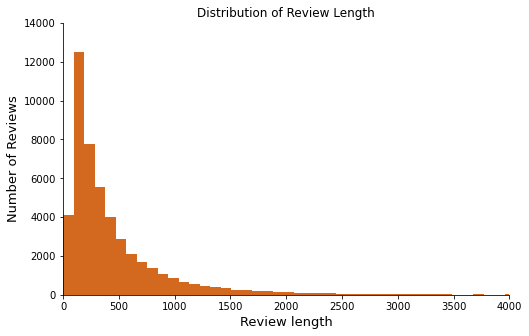

In [131]:
plt.figure(figsize=(8,5))

plt.hist('review_length',data=df, bins=150, color = 'chocolate')

sns.despine()
plt.title("Distribution of Review Length")  
plt.ylim(0,14000)
plt.xlim(0,4000)
plt.xlabel('Review length', fontsize= 13)
plt.ylabel('Number of Reviews',  fontsize= 13)

plt.savefig('../Images/Distribution_of_review_length.jpg');

---
**3.** Look at the top brands in the data 

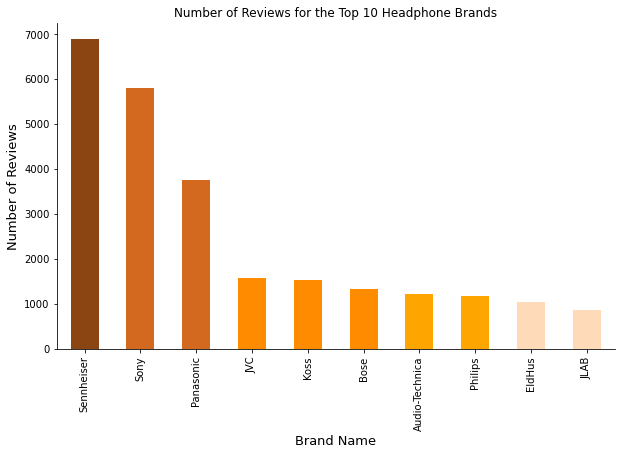

In [9]:
brands = df["brand"].value_counts()

plt.figure(figsize=(10,6))    
mycolors =['saddlebrown', 'chocolate', 'chocolate', 'darkorange', 'darkorange', 
         'darkorange', 'orange', 'orange','peachpuff','peachpuff']

brands[:10].plot(kind='bar', color = mycolors) 

sns.despine()
plt.title("Number of Reviews for the Top 10 Headphone Brands")
plt.xlabel('Brand Name', fontsize= 13)
plt.ylabel('Number of Reviews', fontsize= 13)

plt.savefig('../Images/Top_10_brands.jpg', bbox_inches='tight');